# Samuels Viewer

Interface to functionality for viewing and comparing corpora processed with the Samuels Processor

In [1]:
import SamuelsCorpus as Sam
%matplotlib inline

Set up some filenames - these should be the base names (Samuels Viewer will add the _combined.csv and _cooccurrence.json endings for the individual files.  Only set the parentdir if these files are not stored in the current directory.)

In [2]:
#parentdir="/Users/juliewe/Dropbox/oldbailey/speech_corpora/theft/all/samuels_tagged"
filenames={'fnonl':'f_nonl','mnonl':'m_nonl'}
           

Load up files into a Samuels Viewer

In [3]:
mnonl=Sam.Viewer(filenames['mnonl'],colors=['b'])

Now we can play with the bag-of-words functionality in the SamuelsViewer

Size of corpus is 1083003
(ZC [Grammatical Item],269044) : [('the', 70180), ('and', 29582), ('of', 21782), ('a', 20950), ('to', 20172), ('in', 18077), ('on', 9120), ('at', 7166), ('had', 5855), ('with', 5752)]
(NULL,147919) : [(',', 68751), ('.', 44619), (';', 29054), ('-', 1731), (':', 1378), ('(', 660), (')', 652), ('"', 484), ('?', 390), ('!', 117)]
(ZF [Pronoun],140523) : [('i', 55395), ('he', 21244), ('it', 13813), ('him', 13537), ('me', 8565), ('them', 5033), ('she', 4693), ('they', 3498), ('her', 3012), ('we', 2620)]
(AK.01.g [State/condition],40193) : [('was', 18535), ('am', 6958), ('is', 4690), ('were', 3624), ('been', 1955), ('be', 1669), ('are', 1448), ('way', 434), ('being', 430), ("'s", 377)]
(AP.04 [Number],25141) : [('two', 3211), ('one', 2279), ('three', 1709), ('five', 1171), ('four', 1111), ('six', 921), ('ten', 843), ('last', 813), ('seven', 802), ('eight', 747)]
(AW.01 [Owning],19641) : [('my', 9806), ('his', 6141), ('her', 1526), ('our', 590), ('own', 509), ('their

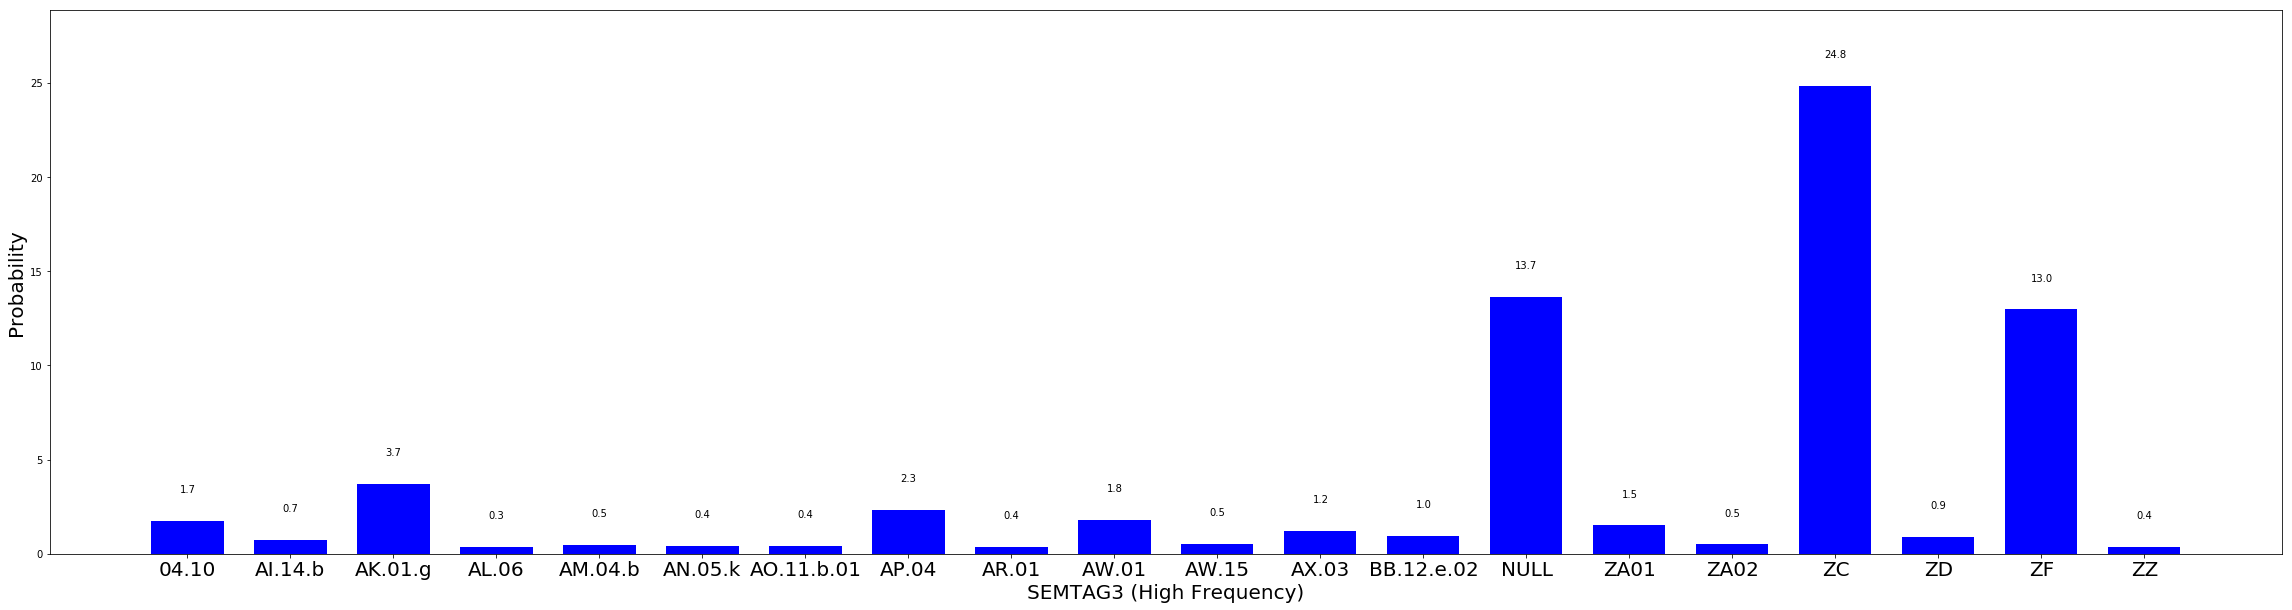

In [4]:
mnonl_tagbag=mnonl.make_bow(field='SEMTAG3',cutoff=20,displaygraph=True)

There are functions to find tags for words and words for tags e.g.,

In [5]:
print(mnonl.find_tags('woman',field='SEMTAG3'))
print(mnonl.find_tags('women'))

[('AD.03.b [Woman]', 673), ('AY.06.b [The common people]', 12), ('AY.01.g.01 [Married woman]', 4), ('BB.09.b.01 [Servant]', 3)]
[('AD.03.b [Woman]', 77), ('AY.06.b [The common people]', 3), ('BB.09.b.01 [Servant]', 1), ('AY.01.g.01 [Married woman]', 1)]


In [6]:
print(mnonl.find_tags('man'))
print(mnonl.find_tags('men'))

[('AD.03.a [Man]', 2885), ('AD.03.h.01 [Old man]', 9), ('ZA01 [Personal Name]', 2), ('AB.17.e.04.e [Digit - finger, toe]', 2)]
[('AD.03.a [Man]', 521)]


In [7]:
print(mnonl.find_text('AD.03'))

[('person', 664), ('somebody', 128), ('persons', 75), ('one', 9), ('some', 9), ('customers', 8), ('senior', 7), ('customer', 7), ('junior', 6), ('character', 4)]


In [8]:
print(mnonl.find_text('AD'))

[('people', 225), ('peoples', 5), ('nature', 5), ('mon', 1), ('human', 1)]


In [9]:
print(mnonl.find_tags('child'))
print(mnonl.find_tags('children'))

[('AD.03.d [Child]', 160), ('AY.01.e.02 [Child]', 9), ('AR.46.c [Suggestion, proposal]', 2), ('ZA01 [Personal Name]', 1), ('AK.03.b [Source/origin]', 1)]
[('AD.03.d [Child]', 89), ('AY.01.e.02 [Child]', 5)]


In [10]:
print(mnonl.find_text('AD.03.b'))

[('woman', 673), ('women', 77), ('wife', 11), ('sister', 4), ('piece', 3), ('petticoat', 2), ('pieces', 1), ('petticoats', 1), ('mare', 1), ('ladies', 1)]


In [11]:
print(mnonl.find_text('AD.03.a'))

[('man', 2885), ('men', 521), ('gentleman', 23), ('piece', 17), ('horse', 16), ('boy', 10), ('pieces', 8), ('horses', 7), ('a', 3), ('mans', 2)]


In [12]:
print(mnonl.find_text('AD.03.d'))

[('child', 160), ('children', 89), ('small', 9), ('smaller', 1)]


We can also view the co-occurrence distributions for tags.  

* Note that the number associated with the tag is a weight.  Currently it is set to be normalised localised PPMI.  Localised PPMI multiplies PPMI by probability.  Normalisation means that the vector is a unit vector (this won't change the order of saliency but typically makes all of the numbers smaller since the unit vector has length 1 ... the reason for doing this is that it is then more efficient to compute similarities between vectors).

* The list of words (and associated words) for the conceptual features ARE NOW context-specific i.e., words used to express this conceptual feature in the specific context of the given tag.

<201>: Jamaica ; he keeps an unruly house ; here is a woman here , that he has offered a guinea 
<2240>: the affair happened ? I had been up stairs with a young woman for a quarter of an hour , 
<5108>: rest of my defence I leave to my counsel . A woman told me , if I would carry that 
(_det:ZC [Grammatical Item],0.9281662504790895) : [('the', 340), ('a', 229), ('this', 51), ('an', 6), ('these', 5)]
<2241>: affair happened ? I had been up stairs with a young woman for a quarter of an hour , and 
<3672>: with me , and I gave two handkerchiefs to these young women ; I went to this gentleman 's shop 
<5490>: nothing to say . When I went away , this young woman was in the yard , and I said 
(_amod:AF.05 [Plants defined by age/cycles],0.2309745799292507) : [('young', 58)]
<104012>: the name of Mary Ridley , otherwise Riley ; the other woman purchased half a quarter of a yard of 
<104064>: the dropped the calico from under her apron ; the other woman was with her then ; a person that 
<31625

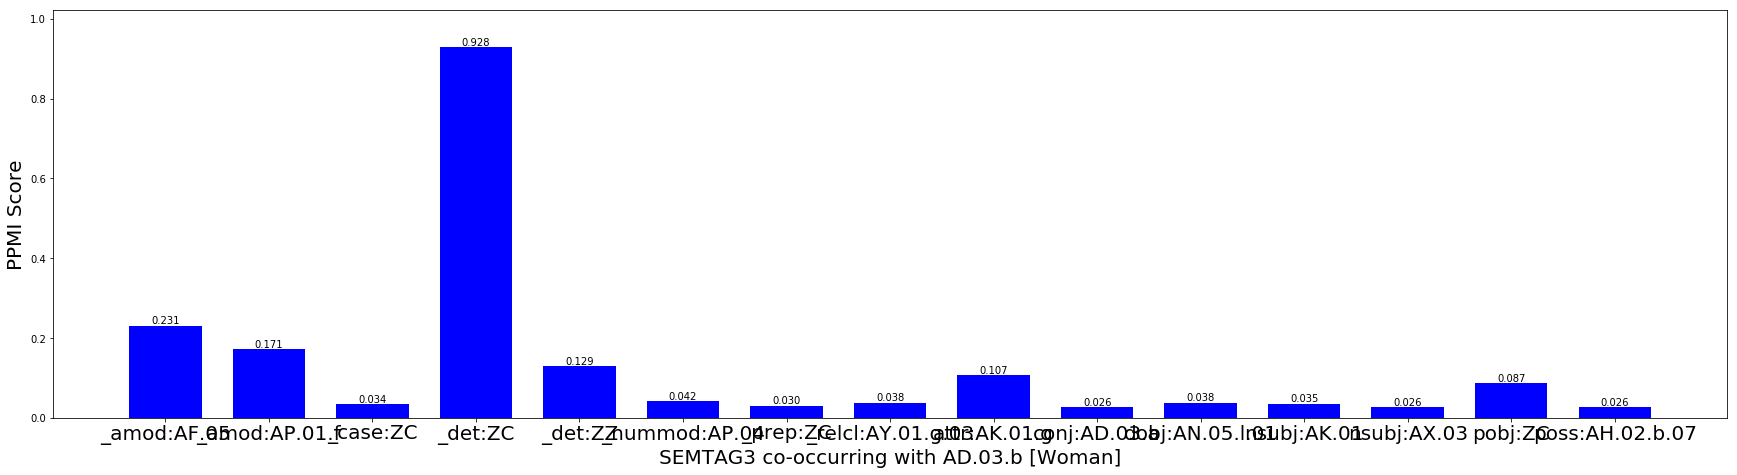

In [13]:
woman=mnonl.get_top_features('AD.03.b',displaygraph=True,cutoff=15)

(_det, 0.9203651401451238)
(_amod, 0.2973927104807386)
(nsubj, 0.16203072207077043)
(_relcl, 0.11509167441101174)
(attr, 0.09795235879648512)
(pobj, 0.08673589795168965)
(dobj, 0.05799222379574188)
(_acl, 0.04354990892729252)
(_nummod, 0.036396711686242214)
(_case, 0.030951843006760276)


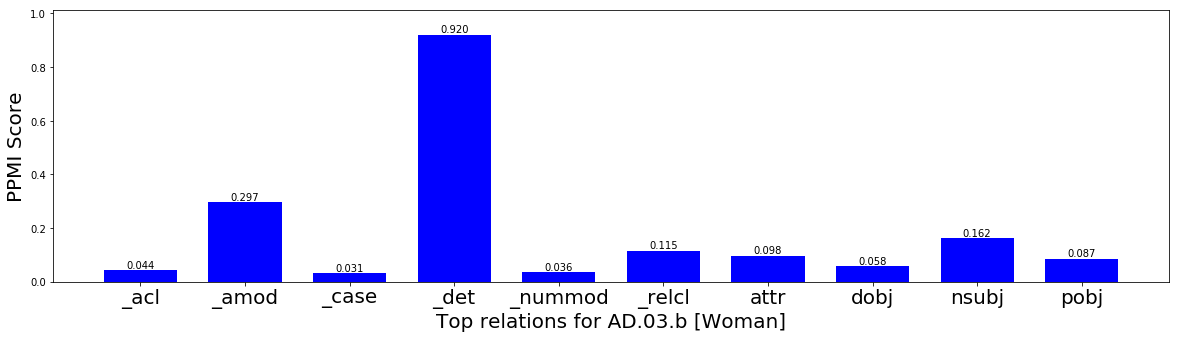

In [14]:
r=mnonl.get_top_relations('AD.03.b',displaygraph=True,cutoff=10)

(_det, 0.8818533822427765)
(_amod, 0.30532335425871787)
(attr, 0.2431648078630329)
(_relcl, 0.18396669039938038)
(nsubj, 0.14176854216186763)
(dobj, 0.07403056330863408)
(_nummod, 0.07332339985939462)
(_acl, 0.06442636740579129)
(pobj, 0.026779218706026807)
(_case, 0.01720247642340742)


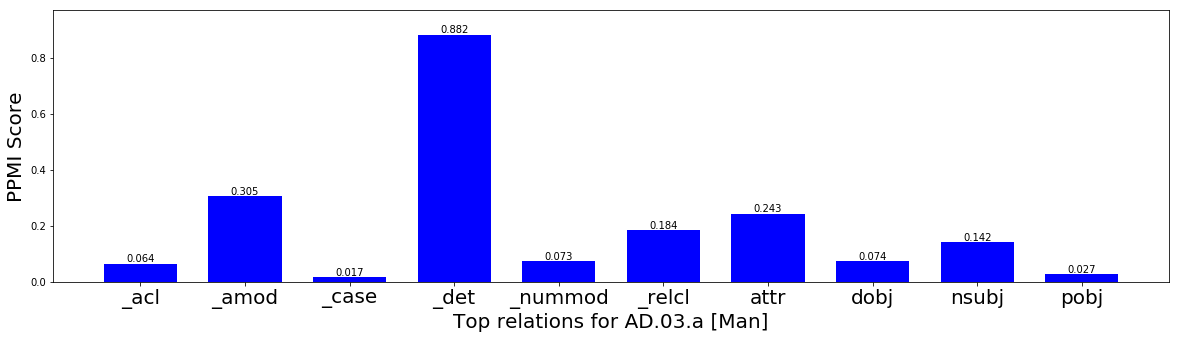

In [15]:
mr=mnonl.get_top_relations('AD.03.a',displaygraph=True,cutoff=10)

(_det, 0.7067210351876916)
(_nummod, 0.42740740409175293)
(_case, 0.3274028447692652)
(conj, 0.2495486191458458)
(_poss, 0.2452309605613258)
(poss, 0.1497389645090203)
(pobj, 0.14243112706534838)
(dobj, 0.138021427898484)
(_amod, 0.12056072508087409)
(_relcl, 0.0730902772281184)
(nsubj, 0.0678074348818081)
(attr, 0.031671446725905036)
(amod, 0.028233542704519974)
(_acl, 0.012556244589903504)
(_predet, 0.005874857457367353)


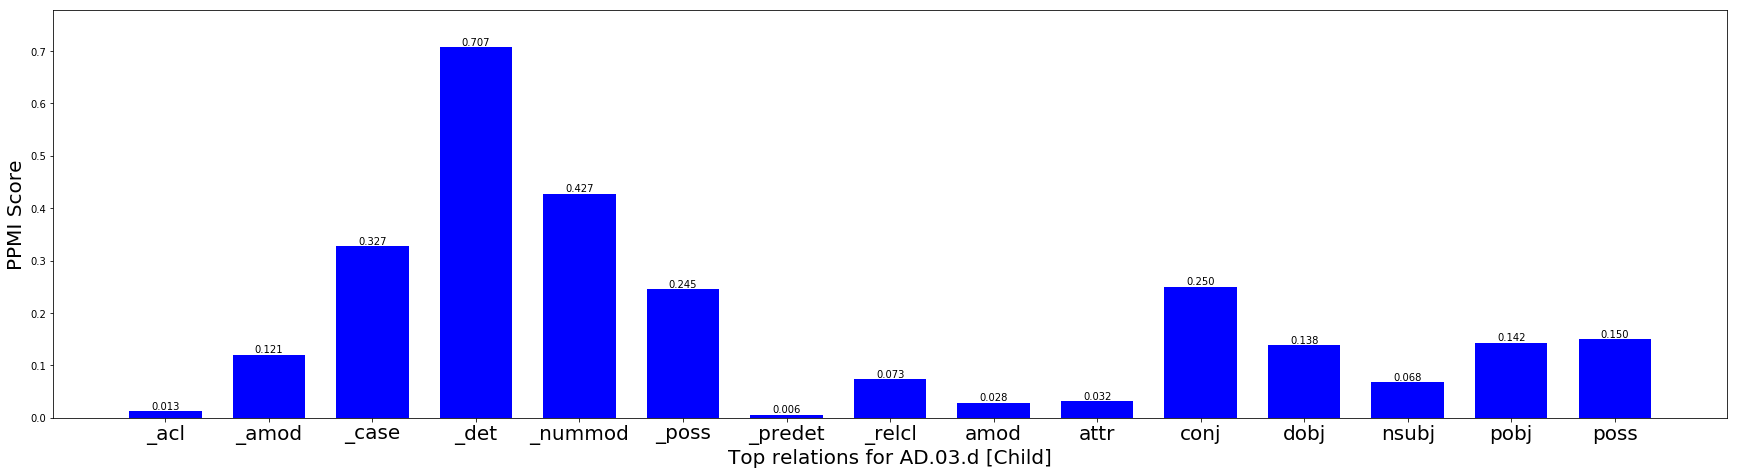

In [16]:
cr=mnonl.get_top_relations('AD.03.d',displaygraph=True,cutoff=15)

(_acl,-0.02087645847849877)
(_amod,-0.007930643777979252)
(_appos,0.0018997943843289838)
(_case,0.013749366583352855)
(_det,0.03851175790234729)
(_nummod,-0.03692668817315241)
(_predet,-0.0018610545183865479)
(_prep,0.016022768325470685)
(_relcl,-0.06887501598836863)
(attr,-0.1452124490665478)
(dobj,-0.016038339512892207)
(nsubj,0.020262179908902805)
(nsubjpass,0.0035332033425749232)
(pobj,0.05995667924566284)
(poss,0.0036357214030100222)


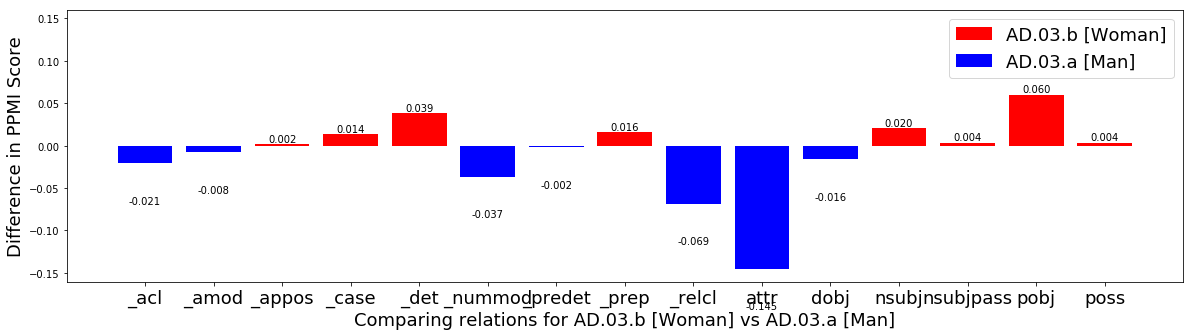

In [17]:
diffs=mnonl.compare_relations(['AD.03.b','AD.03.a'],cutoff=15)

<2241>: affair happened ? I had been up stairs with a young woman for a quarter of an hour , and 
<3672>: with me , and I gave two handkerchiefs to these young women ; I went to this gentleman 's shop 
<5490>: nothing to say . When I went away , this young woman was in the yard , and I said 
(AF.05 [Plants defined by age/cycles],0.8819557730260679) : [('young', 58)]
<104012>: the name of Mary Ridley , otherwise Riley ; the other woman purchased half a quarter of a yard of 
<104064>: the dropped the calico from under her apron ; the other woman was with her then ; a person that 
<316250>: known the prisoner for years in our neighbourhood . The other woman was left in the passage after the prisoner 
(AP.01.f [Difference],0.44416468549368315) : [('other', 57)]
<372677>: door ; the prisoner at the bar , and an elderly woman , were together , the elderly woman stood 
<372684>: , and an elderly woman , were together , the elderly woman stood right fronting the door , and the 
<372788>: looke

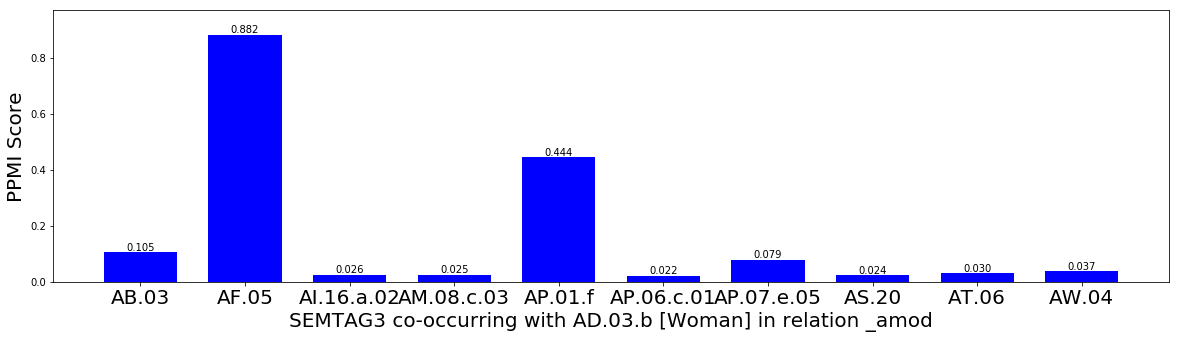

In [18]:
w=mnonl.get_top_features('AD.03.b',rel='_amod',displaygraph=True)

<2409>: under the coach , and said I had picked that young man 's pocket of the lace , and then 
<5405>: nothing to say . I bought these taps of a young man that was going Armourer 's mate on board 
<13567>: the house , and in that state in which a young man of my description ought not to have appeared 
(AF.05 [Plants defined by age/cycles],0.9595112729210316) : [('young', 243)]
<313163>: here is ; an account of the names of the different men who had a claim upon Messrs . Hatchet 
(AP.01.f [Difference],0.23392524841151652) : [('other', 167), ('different', 1)]
<48966>: I did not know any thing of it . A tall man passed me , and made a rush , 
<587331>: was passing down Lombard-street , near Change-alley I saw a tall thin man with Mr. Hunt , they were talking 
<587598>: the horses . Yes . Yes ; he was a tall thin man , with a fustian jacket . That 
(AB.17.c [Bodily height],0.08001286176174242) : [('tall', 17), ('taller', 2)]
<9606>: not do any harm to nobody , I am a labouring man , and 

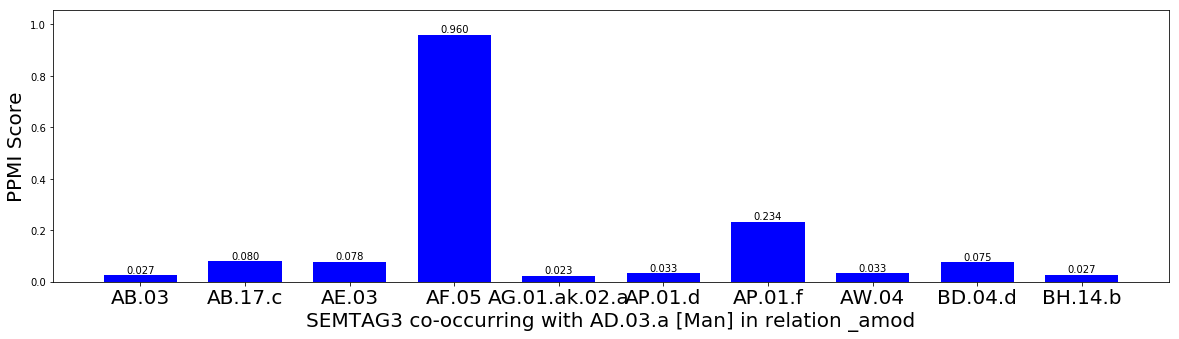

In [19]:
m=mnonl.get_top_features('AD.03.a',rel='_amod',displaygraph=True)

Salient products
[('AF.05 [Plants defined by age/cycles]', 0.8462465064362947), ('AP.01.f [Difference]', 0.10390133438973294), ('AB.03 [Age]', 0.00280631179863875), ('BD.04.d [Probity/honesty/uprightness]', 0.0014169735317181992), ('AP.07.e.05 [Fact/action of being joined/joining]', 0.0012911149030572623), ('AW.04 [Poverty]', 0.0012145275261361407), ('AP.06.c.01 [Addition/supplementation]', 0.000133840608311616), ('AG.01.ak.02.b [Moderation in drinking]', 5.3376844844947824e-05), ('AR.39.a [Sincerity]', 5.3376844844947824e-05), ('AU.37.e [Pomposity]', 4.06376874731476e-05)]
Salient differences
(AB.03 [Age],0.07888671931931128)
(AB.17.c [Bodily height],-0.08001286176174242)
(AE.03 [Domestic animal],-0.07825346004174877)
(AF.05 [Plants defined by age/cycles],-0.07755549989496369)
(AP.01.d [Identity],-0.033071669985961887)
(AP.01.f [Difference],0.21023943708216664)
(AP.07.e.05 [Fact/action of being joined/joining],0.0628615780111064)
(AT.06 [Badness/evil],0.02974568233563226)
(BD.04.d [Pr

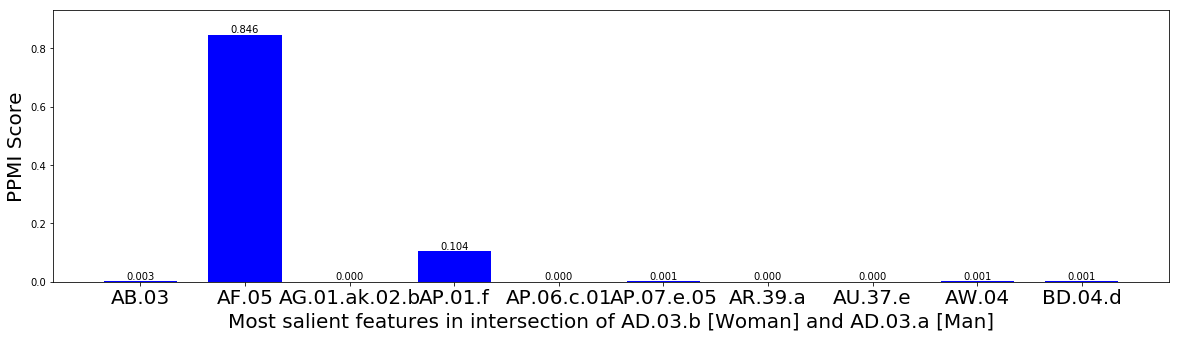

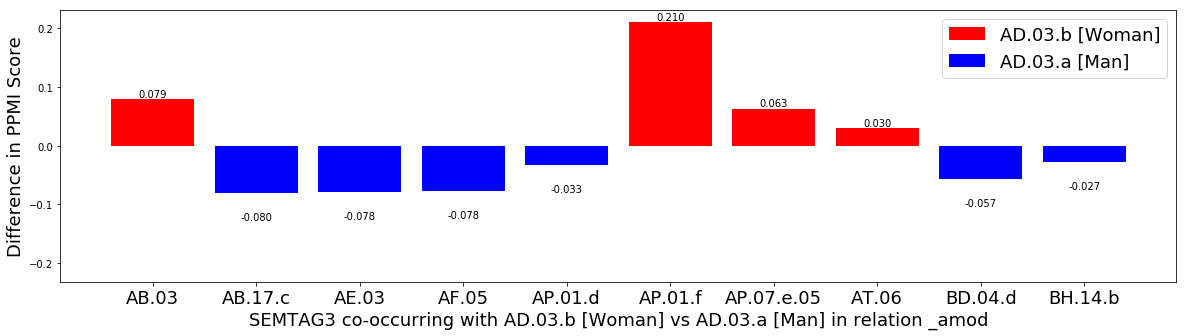

In [20]:
diff=mnonl.compare_features(['AD.03.b','AD.03.a'],rel='_amod')

<69948>: could not find him again . I was going to meet a young woman ; I mistook the prosecutrix for 
(AN.05.l.01 [Meeting/encounter],0.8192414024662863) : [('met', 13), ('meet', 1)]
<2>: I never saw the woman in my life . I was told 
<15766>: work all day ; I was coming along , and saw this woman with five or six young men ; 
<22805>: other man to shew them to him . I never saw this woman before . I was committed for the 
(AI.14.b [Seeing/looking],0.32736072224294593) : [('saw', 17), ('seen', 2), ('see', 1)]
<607708>: the service of Messrs . Flint and Ray , I served the other woman with some handkerchiefs . The prisoner 
<684283>: think you had better serve her ; and while I served the woman , he quitted that part of the 
(AG.01.v [Serving food],0.2630711508788512) : [('serving', 2), ('served', 2)]
<106038>: On the 26th of April I was sent for to take a woman of the name of Davis into custody 
<359887>: turkey and goose ; we sent for a constable to take the woman to the Magistrate 's

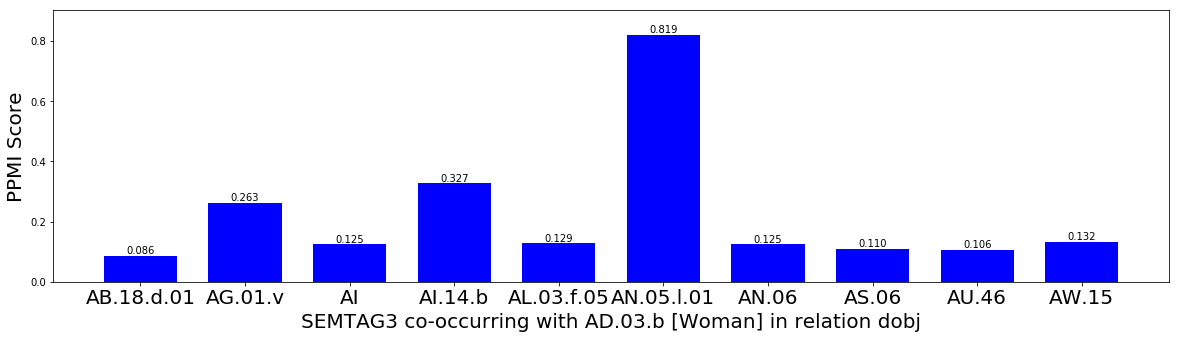

In [20]:
w=mnonl.get_top_features('AD.03.b',rel='dobj',displaygraph=True)

In [22]:
mnonl.find_text('BH.14.b')

[('seafaring', 9), ('watched', 8), ('watch', 6), ('watching', 3)]

<611033>: through Paternoster Row , leading to Union Street , I observed three men following the waggon , they were in 
(AI.14.b [Seeing/looking],0.8443905455724461) : [('saw', 138), ('seen', 10), ('seeing', 4), ('see', 4), ('observed', 1)]
<738403>: he bought them of a man , he was to meet the same man again at two o'clock , at 
(AN.05.l.01 [Meeting/encounter],0.48281896423249193) : [('met', 45), ('meet', 1)]
<392828>: of John Floyd , he was a labourer ; I had two other men at that time ; John Floyd 
<534504>: ; the officer came and let me know that they had a man of the description I had given of 
(AR.36 [Knowledge],0.08458602582896964) : [('knew', 15), ('know', 13), ('had', 2), ('has', 1)]
<415410>: the prisoner , was behind with his coat off , following the other man with the box ; I followed 
(AN.03.d.02 [Following behind],0.08319885043519551) : [('pursued', 10), ('pursuing', 1), ('pursue', 1), ('following', 1)]
<109090>: me in his hand ; I immediately holloaed out , stop that man

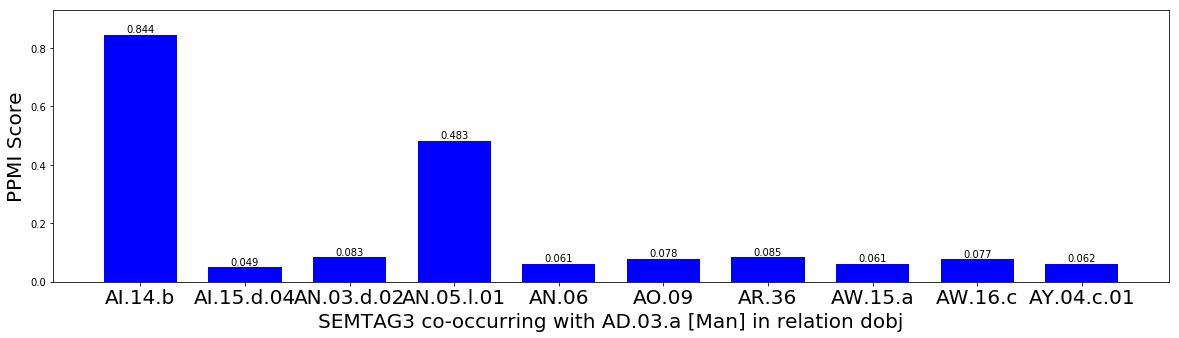

In [21]:
m=mnonl.get_top_features('AD.03.a',rel='dobj',displaygraph=True)

<487853>: just about dusk ; I knew him before . I had a young child in my arms ; I gave 
<505676>: them all to me to liberate her , for she had six children . I told her , an officer 
<549837>: officer , and the soap was also brought . I had my three children in bed . I am a 
(AR.01 [Mental capacity],0.6778259690242985) : [('had', 7), ('have', 2), ('has', 1)]
<18561>: in that morning , and I had no coals to warm my three children ; I went on board a 
(AJ.09.a [Quality of colour],0.3090183229700636) : [('warm', 1)]
<800655>: with me five months ; I had another servant that nursed the child . On Sunday I went out about 
(BK.01.d.04.c [Billiards/pool/snooker],0.3090183229700636) : [('nursed', 1)]
<801161>: was locked up ; I left the other servant who nursed the child at home , with the prisoner , 
(BE.01 [Upbringing],0.3090183229700636) : [('nursed', 1)]
<665869>: went to a school at Finchley , where the prisoner teached the children to write . I was there informed 
(BE.02 [Teaching],0.24

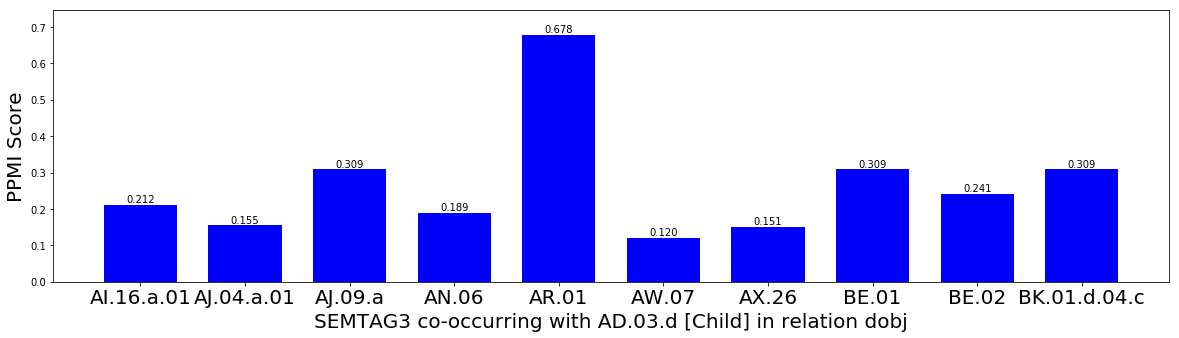

In [22]:
c=mnonl.get_top_features('AD.03.d',rel='dobj',displaygraph=True)

<4810>: man and two women before me , and this gentleman came up and laid hold of me ; the bat 
<46274>: in my hand and looked at it ; that woman came up and took it out of my hand , 
<243720>: wife lives , and went away directly . The woman came in a great fright , and said , I 
(AK.01 [Existence],0.6428908232938382) : [('came', 15)]
<82516>: to be his wife , and another old man , came into the shop , about four o'clock in the 
<316075>: seven and eight o'clock , the prisoner and another woman came in for a pint of beer , and in 
<371528>: proceeded to the prisoner 's house ; the scouring woman came into the house with a basket full of pots 
(AW.06.b [Receiving],0.39570179773871583) : [('came', 9), ('come', 2), ('received', 1), ('got', 1)]
<10270>: . On Saturday night , the prosecutor and a woman came up stairs , and wanted to sleep there ; 
<183311>: , having a pint of beer ; these two women came in with a steak ; Mrs. Cathery hung her 
<282442>: tippet honestly ; if the woman I boug

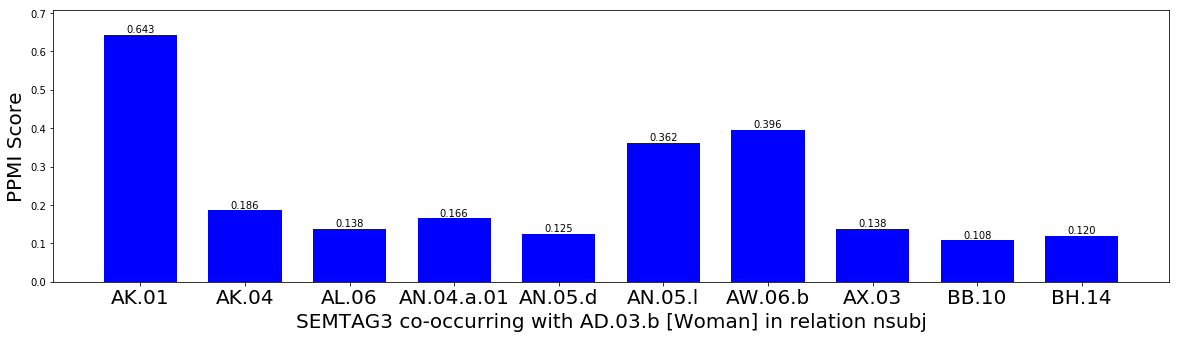

In [23]:
w=mnonl.get_top_features('AD.03.b',rel='nsubj',displaygraph=True)

<6496>: was making water down the gateway , and this man came up , and said , I had taken the 
<10642>: was running pretty fast down Sloane-street , when this man came up , and said I had stole his sowl 
<26449>: first time ; on my not hearing , the man came up , and said I was wanted ; when 
(AK.01 [Existence],0.5950974477144844) : [('came', 46), ('come', 2), ('exist', 1)]
<205887>: upon the steps ; the man who was with me accosted him - you seem to have got a heavy 
(AN.05.l [Movement towards a thing/person/position],0.40454685118073885) : [('came', 33), ('come', 8), ('accosted', 1)]
<6714>: stopped me and the man run away . A man gave it me to hold a minute , while he 
<12169>: had been stolen , and surrendered myself . A man gave them me to carry . GUILTY , aged 22 
<18577>: went on board a sailing barge , and the man gave me some coals . I had a fare , 
(AW.11 [Giving],0.2978399745128611) : [('gave', 46), ('given', 4), ('returned', 3), ('give', 2)]
<770663>: night ; a young man th

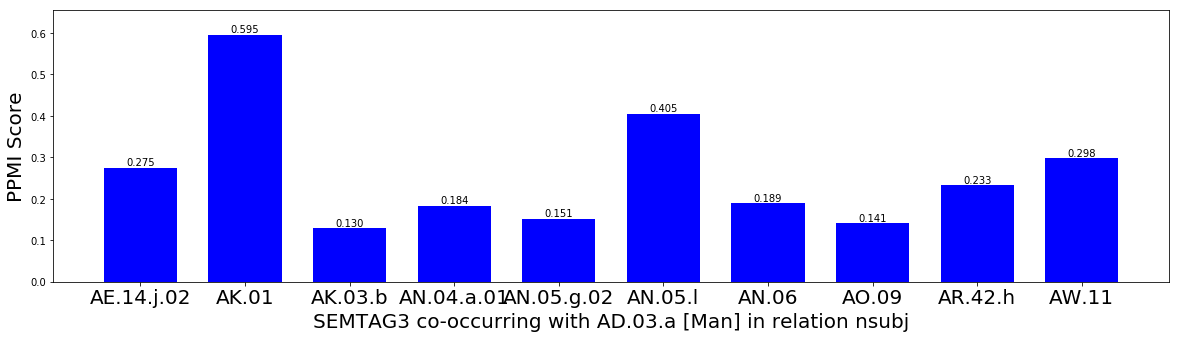

In [24]:
m=mnonl.get_top_features('AD.03.a',rel='nsubj',displaygraph=True)

<4238>: my charge . I am as innocent as the child unborn ; I know nothing at all of it . 
<4522>: the place . I am as innocent as the child unborn . The evidence given by Hill is totally false 
<4720>: . I know no more of it than the child unborn . I was promised forgiveness from my master ; 
(AK.01 [Existence],0.95409124845893) : [('unborn', 13)]
<1007085>: about half-past nine o'clock in the morning , my child alarmed me , and said there was a man in 
(ZZ [Unrecognised],0.1908840760562933) : [('crying', 3), ('alarmed', 1)]
<570970>: and when I came home , I saw my child naked , he appeared to have suffered from the cold 
(AH.02.c.01 [Nakedness/state of being unclothed],0.15217994695633166) : [('naked', 1)]
<451374>: the Saturday following he was going to have his child christened at St. George 's church . Mr. Whiffing promised 
(AX.21 [Naming],0.08381256030723544) : [('christened', 1)]
<408233>: found he was out with the beadle having the child cried . We both went there and found th

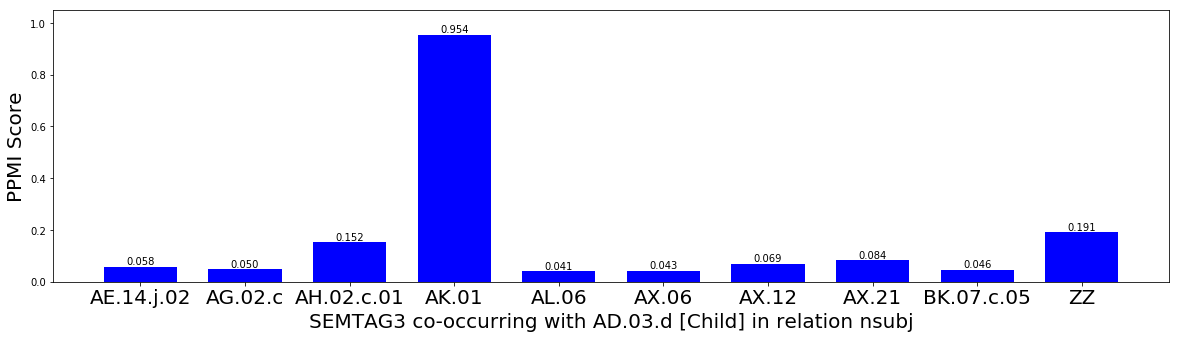

In [25]:
c=mnonl.get_top_features('AD.03.d',rel='nsubj',displaygraph=True)

<32795>: get some bags made ; he knew my wife was distressed well enough ; she made some for him although 
(BC.09.e.01 [Legal seizure/recovery of property],0.6014147240705527) : [('distressed', 1)]
<7214>: that I can make , that my wife has been imposed upon by some person who has called at our 
(BB.02.a [Command/bidding],0.34388154348981465) : [('imposed', 1)]
<438681>: are now . I asked if the woman should be convicted whether I should be entitled to one . No 
(BC.09.f.05 [Judging],0.3265429245859007) : [('convicted', 1)]
<522534>: prisoner in the midst of them . The woman was examined , but nothing was found upon her . I 
(AC.02.c.01 [Examination],0.3074593188127572) : [('examined', 1)]
<102744>: to follow me to the Justice ; the woman was committed , and through what she said against Stonard , 
(BC.09.e.02 [Arrest],0.30323199548151786) : [('committed', 1)]
<498672>: I was constable of the night when this woman was brought in ; this shawl , handkerchief , and gown 
(AN.05.j [Going/c

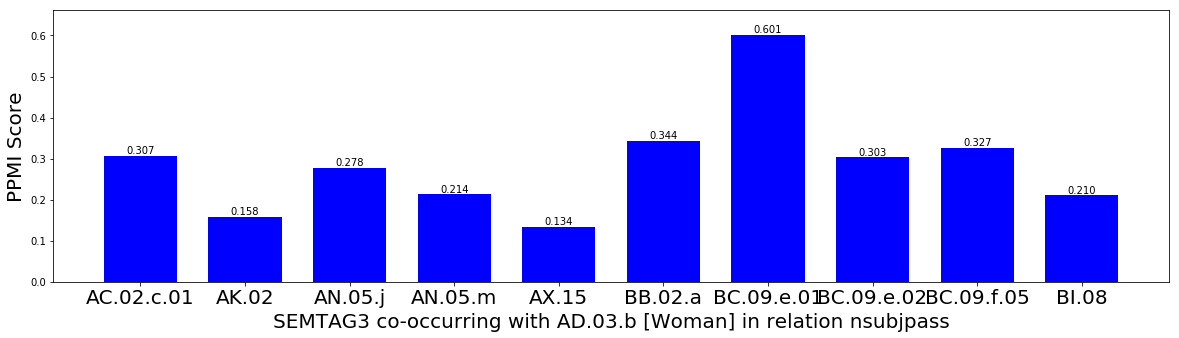

In [26]:
w=mnonl.get_top_features('AD.03.b',rel='nsubjpass',displaygraph=True)

<46685>: inquired the cause . He was informed a man was taken with a pocket-book . He had no more suspicion 
<52021>: . I was taken in Portland-street . Another man was taken in custody before me . I leave myself to 
<193828>: ; about two days after , another black man was taken into custody , and kept for ten days till 
(AW.15 [Taking],0.6526073363415216) : [('taken', 10)]
<329794>: Yes , I did say I believed the man was led into it . I have told you as near 
(BB.03 [Control],0.3502282910169718) : [('managed', 1), ('led', 1)]
<87902>: stopped at the corner of Giltspur-street ; the man was expected out of Newgate to go to Execution-dock every minute 
(AR.50 [Expectation],0.24779710111596517) : [('expected', 1)]
<169704>: I , the man that was put in here was handcuffed ; yes , says he , but I have 
(BB.09.e.01.b [Binding/fettering],0.2143014938672501) : [('handcuffed', 1)]
<581357>: , the man that was confined in the room is escaped through the window . Yes . I positively do 
(AO.16.c [

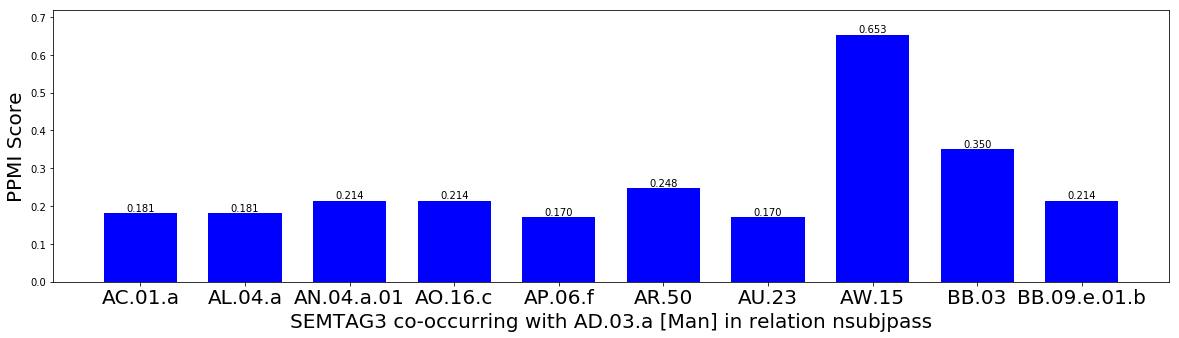

In [27]:
m=mnonl.get_top_features('AD.03.a',rel='nsubjpass',displaygraph=True)

<27548>: innocent as a child unborn ; when the child was examined at the Office , she had not a word 
(AC.02.c.01 [Examination],0.7004917057259638) : [('examined', 1)]
<570902>: , he is four years old ; the child was dressed in a frock and trousers . I went one 
(BJ.01.j [Selling],0.5301059831903824) : [('dressed', 1)]
<284459>: she would not be searched till all the children were searched , for Mrs. Cross keeps a boarding-school . I 
(AO.11.b [Searching/seeking],0.477806463743311) : [('searched', 1)]


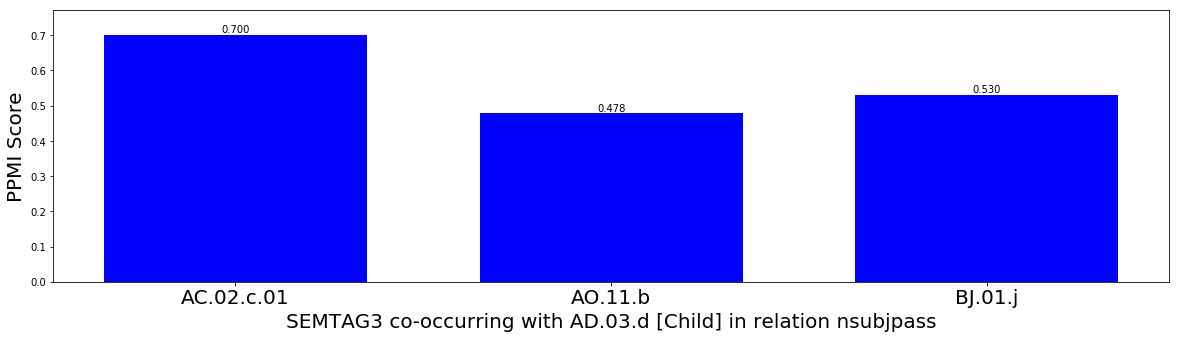

In [28]:
c=mnonl.get_top_features('AD.03.d',rel='nsubjpass',displaygraph=True)

<70205>: stole the tea-board . Was you not intoxicated and with another woman when you took hold of me I leave 
<103999>: the prisoner at the bar came into my shop with another woman of the name of Mary Ridley , otherwise 
<130595>: the way we saw the prisoner , in company with another woman , she was going towards home ; I 
(ZZ [Unrecognised],0.9976968385830179) : [('another', 41)]
<11185>: . I can sleep better on the hard boards than that woman can on a feather-bed ; she is the 
<46272>: the coat in my hand and looked at it ; that woman came up and took it out of my 
<51617>: room ; it is false . I only slept with that young woman two or three times . The papers 
(ZF [Pronoun],0.05035391075948647) : [('that', 14)]
<517783>: secured the house , and at the same time I said young woman , I suppose your mistress has told 
(AX.03 [Speech],0.04462143405397368) : [('said', 1)]
<603980>: woman take the bag of money off the drawer , which woman I believe to be the prisoner . I 
(AP.01 [Relati

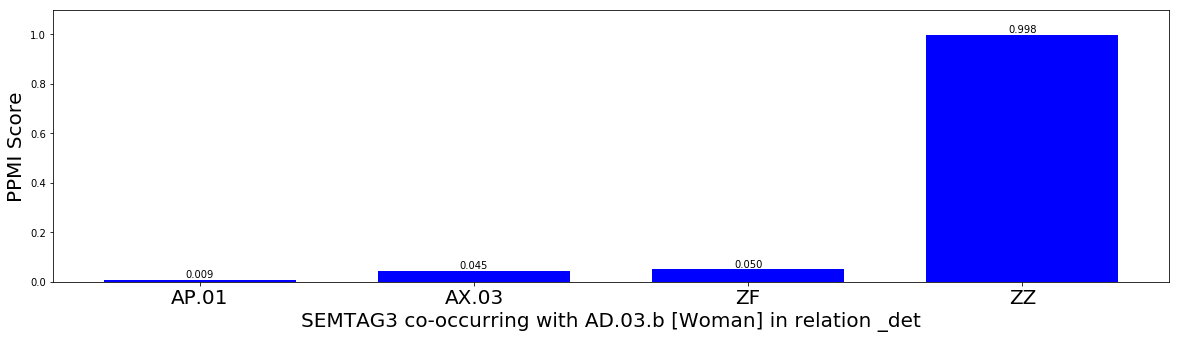

In [29]:
w=mnonl.get_top_features('AD.03.b',rel='_det',displaygraph=True)

<8459>: my way from him , till I was took by another man . I will take my oath I never 
<10123>: a stranger . I was at the window talking with another man , who was standing there ; after asking 
<11161>: the way . I did not take the ass ; another man brought it to me , and then run 
(ZZ [Unrecognised],0.9985545449877657) : [('another', 195)]
<3758>: totally innocent of the robbery . When I met with that man at Dartford , he said , why did 
<12283>: him for making a false report . I never saw that man till I saw him at the watch-house . 
<14888>: ; several people were rushing forward at once , and that man took me ; the chief part of my 
(ZF [Pronoun],0.04643557151941285) : [('that', 62)]
<154741>: last . No , nor did I know that such a man did exist , till I was arrested . 
<724885>: horse . I got from them an account that such a man had been on the road . After that 
<752665>: their foreman ; I asked him if they had such a man ; he said , they had . I 
(AD.03.a [Man],0.02450347269510

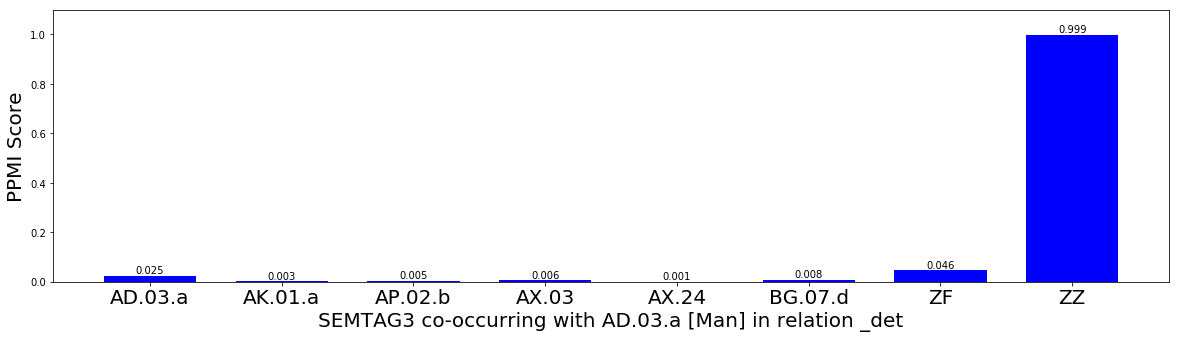

In [30]:
m=mnonl.get_top_features('AD.03.a',rel='_det',displaygraph=True)

<2079>: stop me ? I know nothing more about it than a child unborn . I leave it to the mercy 
<8363>: because it rained hard ; I am as innocent as a child unborn . GUILTY of stealing the goods , 
<16946>: Court . I know nothing about them any more than a child unborn . The last money I received was 
(ZC [Grammatical Item],0.9894433364574526) : [('the', 76), ('a', 47), ('this', 4), ('an', 1)]
<265152>: they bung at the door ; I went to turn some children from a little gate , and when I 
<439010>: No . Me . His wife , himself , and some children . Two or three half pints of gin 
<553315>: had been both in my waistcoat pocket . There were some children that saw the prisoner , they knew where 
(AP.06 [Quantity],0.1449202675264716) : [('some', 3)]


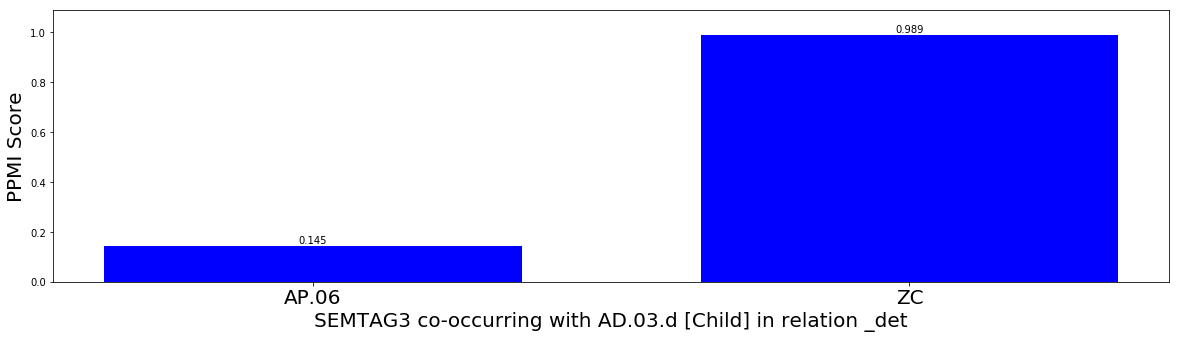

In [31]:
c=mnonl.get_top_features('AD.03.d',rel='_det',displaygraph=True)

# Similar Concepts
We can find the similarity between 2 concepts in the given corpus

First, the similarities between WOMAN-MAN, WOMAN-CHILD and MAN-CHILD over the whole LPMI matrix (all grammatical relations)

We can also look at a particular relation.  We can see that MAN and WOMAN are similar in terms of their adjectival modifies and the verbs which are done to them, but disimilar in terms of the verbs they do.  On the other hand, WOMAN and CHILD and MAN and CHILD seem consistently dissimilar in all these relations.


In [32]:
rels=[None,'_amod','dobj','nsubj','_det','nsubjpass']
for rel in rels:
    print(rel)
    print("WOMAN-MAN: {}".format(mnonl.find_similarity('AD.03.a','AD.03.b',rel)))
    print("MAN-CHILD: {}".format(mnonl.find_similarity('AD.03.a','AD.03.d',rel)))
    print("WOMAN-CHILD: {}".format(mnonl.find_similarity('AD.03.b','AD.03.d',rel)))
    print("-----")

None
WOMAN-MAN: 0.9728788652496243
MAN-CHILD: 0.5205110596689031
WOMAN-CHILD: 0.5267768691515803
-----
_amod
WOMAN-MAN: 0.9572309329278561
MAN-CHILD: 0.0546002247558351
WOMAN-CHILD: 0.055697409301285764
-----
dobj
WOMAN-MAN: 0.6921775490345037
MAN-CHILD: 0.016020086150965493
WOMAN-CHILD: 0.03116051249414836
-----
nsubj
WOMAN-MAN: 0.6955542760547022
MAN-CHILD: 0.6137434726837381
WOMAN-CHILD: 0.6477618634860821
-----
_det
WOMAN-MAN: 0.9988437567333986
MAN-CHILD: 0.0
WOMAN-CHILD: 0.0
-----
nsubjpass
WOMAN-MAN: 0.07125759776689064
MAN-CHILD: 0.03542888834161152
WOMAN-CHILD: 0.21537270267649117
-----


# Finding Nearest Neighbours


In [33]:
concepts=['AD.03.b','AD.03.a','AD.03.d']
for concept in concepts:
    for rel in rels:
        print('{} neighbours for {}'.format(concept,rel))
        print(mnonl.find_knn(concept,rel))
        print("-----")

AD.03.b neighbours for None
[('AD.03.b [Woman]', 1.0000000000000004), ('AD.03.a [Man]', 0.9728788652496243), ('BB.12.e.02 [Prisoner]', 0.9261394294857804), ('BB.09.e.01.a [Confinement]', 0.9244608893292509), ('BI.11.x.01 [Bag]', 0.9080265587075815), ('BC.09.e.03 [Accusation/allegation/indictment]', 0.9010032358826738), ('AD.03.d.01 [Boy]', 0.9009924193283305), ('AY.06.a.03.a [Title/form of address for persons of rank]', 0.8981343889699909), ('BC.07.b [Law-enforcement/peace-officer]', 0.8964143243781715), ('AB.17.f [Bodily substance, tissue]', 0.895703293186243)]
-----
AD.03.b neighbours for _amod
[('AD.03.b [Woman]', 0.9999999999999999), ('AD.03.a [Man]', 0.9572309329278561), ('AD.03.c.02 [Young woman]', 0.8819557730260679), ('BI.12.a.07.a [Skin with hair attached/fur]', 0.8819557730260679), ('AD.03.c.01 [Youth/young man]', 0.8267577472379222), ('BD.05.g.02 [Unchastity]', 0.8130147561320559), ('BE.04 [Member of university]', 0.6951622874109246), ('AU.27.c [Terms of endearment]', 0.6161

[('AD.03.d [Child]', 0.9999999999999999), ('AG.01.d.02 [Part/joint of animal]', 0.9998362130159347), ('BK.01.d.04.e [Card-game]', 0.9995341739075564), ('BK.05.d.05 [Drawing]', 0.9993936942421354), ('BI.11.b [Shaping tools/equipme]', 0.9967444215940044), ('AI.16.a.01.b [Washing clothes and textile articles]', 0.9967444215940044), ('BI.09.c.06 [Woodworker]', 0.9964700221969041), ('BI.11.k [Ladder]', 0.9950647430723482), ('AE.13.o [Order Passeriformes (song-birds)]', 0.9939283270632321), ('BK.01.e.03 [Top]', 0.9925206644156186)]
-----
AD.03.d neighbours for nsubjpass
[('AD.03.d [Child]', 1.0), ('AB.10 [Physical Aspects of Organisms]', 0.5301059831903824), ('AH.01.h.03.c [Made from silk]', 0.5301059831903824), ('BG.07.h [Writing materials]', 0.4835815097317604), ('BA.15.a.02.a [Spear/lance]', 0.477806463743311), ('AM.08.b [The present (time)]', 0.477806463743311), ('AO.09 [Ceasing]', 0.4771016484446194), ('AZ.06.e.01 [Accommodation/lodging]', 0.4544479850936115), ('AG.01.d [Animals for foo

In [24]:
mnonl.find_text('AG.01.h.01.a')

[('lemon', 4), ('lime', 1)]

Salient products
[('AK.01 [Existence]', 0.5950974477144844), ('04.10 []', 0.0), ('AA.04.g [Flowing water]', 0.0), ('AA.11.a [Fine weather]', 0.0), ('AA.11.g [Wind]', 0.0), ('AA.11.i.01 [Rain]', 0.0), ('AB.03 [Age]', 0.0), ('AB.18 [Death]', 0.0), ('AC.01.a [Ill-health in external/visible body parts]', 0.0), ('AC.02.d [Medical treatment]', 0.0)]
Salient differences
(AE.14.j.02 [Horse defined by purpose],0.2752863133727241)
(AK.01 [Existence],-0.40490255228551564)
(AK.03.b [Source/origin],0.12959211674576307)
(AN.04.a.01 [Going swiftly on foot],0.18372486671967536)
(AN.05.g.02 [Leaping/springing/jumping],0.15136715769910306)
(AN.05.l [Movement towards a thing/person/position],0.40454685118073885)
(AN.06 [Transference],0.18935061033520204)
(AO.09 [Ceasing],0.1411679181957021)
(AR.42.h [Dissimulation, pretence],0.23291940544020412)
(AW.11 [Giving],0.2978399745128611)


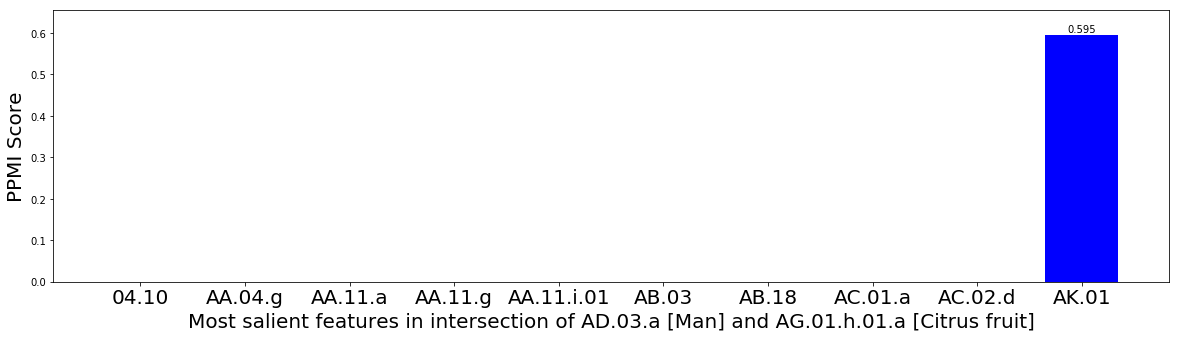

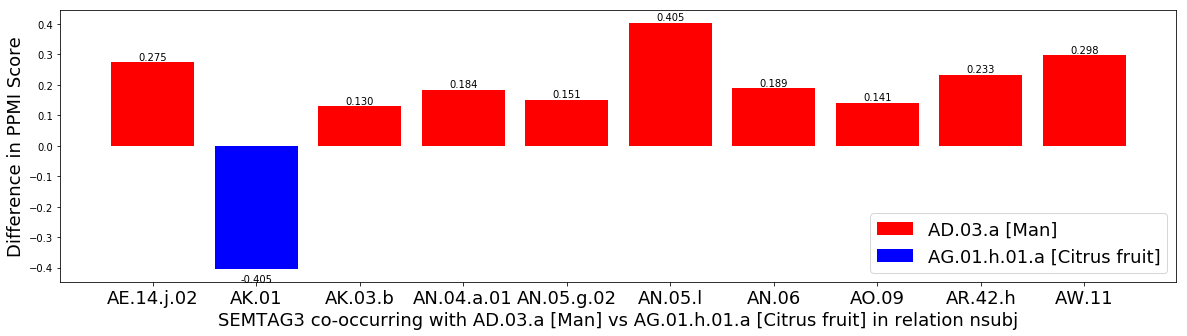

In [26]:
diff=mnonl.compare_features(['AD.03.a','AG.01.h.01.a'],rel='nsubj')

In [27]:
mnonl.find_text('AK.01')

[('things', 926),
 ('came', 622),
 ('thing', 598),
 ('in', 409),
 ('up', 307),
 ('come', 87),
 ('unborn', 28),
 ('being', 9),
 ('is', 8),
 ('comes', 6)]

Ridiculous to be comparing something which occurred 5 times with something which occurred 3000+ times and saying that they are distributionally similar!  Can't know anything about the distribution of the thing which occurred 5 times.  Frequency threshold for neighbours?  Return to vanilla PPMI to identify salient features?  But then we would be looking at co-occurrences with rare concepts  

## Comparing Corpora
We need a Samuels Comparator which takes a dictionary of filenames (as set up above) and allows us to compare one against the rest

In [34]:
test={'fnonl':'f_nonl','mnonl':'m_nonl'}

my_comp=Sam.Comparator(filenames)

Now we can compute the characteristic terms of one corpus compared to the others.  The key for the corpus which is to be compared against the others needs to be given.  

measure: default = 'llr'; others include 'pmi', 'kl' and 'jsd'

field: default = 'SEMTAG3'; any other field in the dataframe can be given e.g., 'SEMTAG1' or 'vard' but not extensively tested

cutoff: all distinctive tags will be returned for LLR, but this is used to cutoff the number for other measures and also in the list that is displayed automatically and is used in the graph

displaygraph: True to display a barchart of the terms 

Size of corpus is 219407
Size of corpus is 1302410
32 significantly characterising terms
Number of characteristic tags is 32
(AY.01.g.02 [Married man], 666.2445392423288) : [('husband', 518), ('husbands', 5)]
(AZ.06.f.02.f [Room], 149.30006373267736) : [('room', 616), ('cellar', 23), ('garret', 10), ('rooms', 7), ('bedroom', 6), ('scullery', 4), ('closet', 4), ('back-parlour', 4), ('sitting-room', 3), ('loft', 3)]
(BF.25.j [Vestments], 135.09548677279872) : [('gown', 165), ('apron', 98), ('gowns', 57), ('aprons', 11), ('shovels', 3), ('shovel', 1)]
(AK.01 [Existence], 120.17439382620603) : [('things', 513), ('thing', 176), ('came', 176), ('in', 140), ('up', 56), ('come', 20), ('unborn', 2), ('ware', 1), ('is', 1), ('existence', 1)]
(AY.01.g.01 [Married woman], 115.59686050713933) : [('wife', 333), ('woman', 3), ("ma'am", 3)]
(AZ.06.f.02.h [Stairs], 113.19441151206863) : [('stairs', 375), ('landing', 3), ('staircase', 2), ('stair-foot', 1), ('stair', 1), ('landing-place', 1)]
(AY.01.e.0

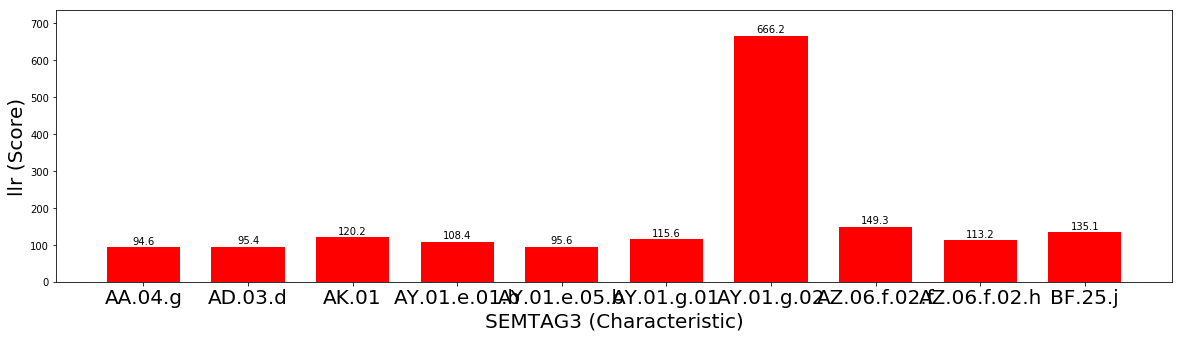

In [35]:
fdef_tags=my_comp.compute_surprises('fnonl',measure='llr',field='SEMTAG3',cutoff=10,displaygraph=True)

Size of corpus is 1083003
Size of corpus is 1302410
10 significantly characterising terms
Number of characteristic tags is 10
(BC.07.b [Law-enforcement/peace-officer], 60.68880761341501) : [('constable', 1131), ('watch-house', 312), ('watchman', 285), ('watchmen', 25), ('constables', 11), ('officer', 6)]
(BB.03 [Control], 53.36672517901514) : [('of', 110), ('charge', 109), ('took', 73), ('led', 47), ('take', 35), ('leads', 25), ('leading', 19), ('lead', 16), ('hold', 11), ('direction', 8)]
(BB.12.d.01 [Instrument/place of torture], 48.76441044771434) : [('horse', 409), ('horses', 131), ('boots', 5), ('wheels', 1), ('wheel', 1), ('picket', 1), ('gridiron', 1)]
(BA.14.k.08.a [Officer/soldier of rank], 47.73528591463277) : [('officer', 1501), ('officers', 111), ('commanding', 1)]
(ZC [Grammatical Item], 45.08773636859837) : [('the', 70180), ('and', 29582), ('of', 21782), ('a', 20950), ('to', 20172), ('in', 18077), ('on', 9120), ('at', 7166), ('had', 5855), ('with', 5752)]
(AK.02 [Creation

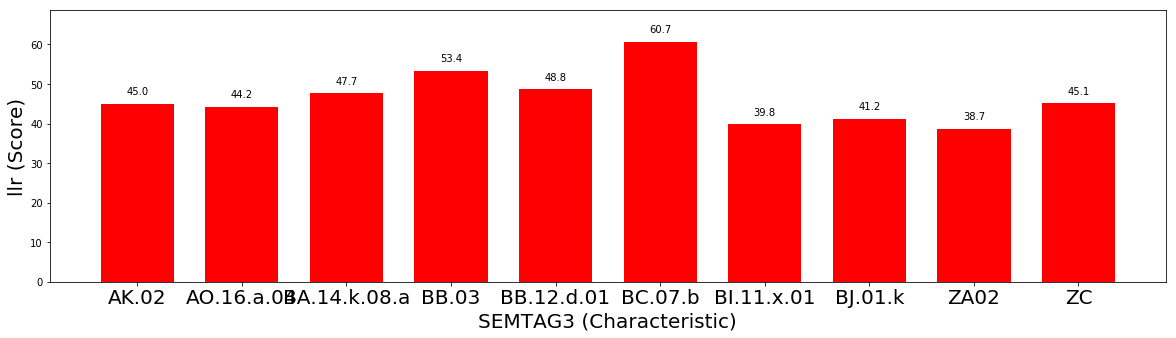

In [36]:
mwv_tags=my_comp.compute_surprises('mnonl',field='SEMTAG3',measure='llr',cutoff=10,displaygraph=True)